# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [ ]:
# Exercises
# In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

Is the distribution of body temperatures normal?

In [2]:
### to determine normality, we look at a histogram and also use the Shapiro-Wilk test (where if the p-value > 0.05, it is normal)

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


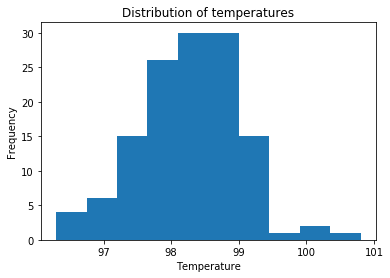

In [5]:
ax = df['temperature'].plot.hist()
ax.set_xlabel('Temperature')
ax.set_title('Distribution of temperatures')

In [6]:
shapiro_results = scipy.stats.shapiro(df['temperature'])
shapiro_results[1]  # this is the p-value, greater than 0.05

0.2331680953502655

Yes, distribution is normal.

Is the sample size large? Are the observations independent?

In [7]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

Yes; 130 is large, greater than 30.
We are assuming that the observations are a random sample and are independent
from each other; all of the men independent from each other and so are the women.

Is the true population mean really 98.6 degrees F?

In [17]:
### first look at the mean and std
### we will use a one sample test because we're not concerned with separating the men from the women, or any other factors
df['temperature'].mean()

98.24923076923078

In [9]:
df['temperature'].std()

0.7331831580389454

In [11]:
### with a large sample, we will use a z statistic.
### 95% confidence level (using a z statistic of 1.96) is determined by taking the value below, +/- the sample mean

In [12]:
(0.7331831580389454 / (129**0.5)) * 1.96

0.12652422809562222

In [13]:
### 98.249 +/- .127 = [98.122, 98.376]

In [14]:
### 99% confidence level (using a z statistic of 2.575)

In [28]:
(0.7331831580389454 / (129**0.5)) * 2.575

0.1662244323195037

In [16]:
### 98.249 +/- .166 = [98.083, 98.415]

Based on the sample given, I would say it seems highly unlikely that the true mean is 98.6, as this is above the 99% confidence threshold.

In [18]:
### to use a two-sample test, we will look at men and women and determine if 98.6 falls in the 99% confidence interval for either

In [19]:
df['temperature'].groupby(df['gender']).count()

gender
F    65
M    65
Name: temperature, dtype: int64

In [20]:
df['temperature'].groupby(df['gender']).mean()

gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64

In [21]:
df['temperature'].groupby(df['gender']).std()

gender
F    0.743488
M    0.698756
Name: temperature, dtype: float64

In [29]:
(0.743488 / (64**0.5)) * 2.575 # females

0.23931020000000003

In [30]:
(0.698756 / (64**0.5)) * 2.575 # males

0.22491208750000002

In [24]:
# 99% confidence interval for females: 98.394 +/- .239 = [98.155, 98.633]
# 99% confidence interval for males: 98.105 +/- .225 = [97.88, 98.33]

In [26]:
# 98.6 does indeed fall in the 99% confidence interval for females, right at the top of the range.
# using this sample, females tend to have a higher body temperature

At what temperature should we consider someone's temperature to be "abnormal"?

In [27]:
# because of the difference in males and females in this sample, they have been separated and a 99.9% confidence level was determined

In [31]:
# margin of error, females (z statistic of 3.29)
(0.743488 / (65**0.5)) * 3.29

0.3033983279083601

In [32]:
# margin of error, males (z statistic of 3.29)
(0.698756 / (65**0.5)) * 3.29

0.28514434935860977

For females, I would consider any temperature outside the range of 98.349 +/- 0.303 [98.046, 98.652] to be abnormal.
For males, I would consider any tempterature outside the range of 98.105 +/- .285 [97.82, 98.39] to be abnormal.

Is there a significant difference between males and females in normal temperature?

In [33]:
### to determine this, we will use the null hypothesis that there is no difference.
### if this is the case, the difference in means should be zero
### we will use a z table because we have enough samples of males and females (> 30 of each)
### the actual difference in means is:

In [34]:
98.393846 - 98.104615

0.2892310000000009

In [35]:
((64 * (0.743488 ** 2) + 64 * (0.698756 ** 2)) / 63) ** 0.5

1.0283767347136543

In [36]:
### z statistic is therefore
0.2892310000000009 / (1.0283767347136543 * ((2 / 65) ** 0.5))

1.6033719319247024

In [37]:
### by viewing a z table, this is 0.9484.
### ultimately, this is just slightly below the threshold of 5%, and pretty far below 1%
### (as the likelihood of this result is 5.16%)

There is probably not a difference in temperatures between men and women, though the likelihood of receiving the sample we did if there is no difference is just over 5%.  We will not reject the null hypothesis.

After reviewing the data, I would not be willing to throw out the 120 year assumption that the mean body temperature is 98.6.  However, our sample made it appear that this temperature may very well be too high.  More research would be needed; what are the conditions where the temperature is being taken (are outside factors relevant, inside an office with no air conditioning, etc.), is age relevant, is there truly a difference between mean temperature in females vs. males.  This exercise leads to more questions than answers.